In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv("heart_disease_data.csv")

In [3]:
# View first 5 rows
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Datatypes and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
# Statistical summary
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
# Check for missing values
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
# Modifying the column names (replacing " " with "_")
data.columns = data.columns.str.replace(' ','_')
columns = data.columns
columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [8]:
# separating the numerical, categorical features and target feature
numeric_features = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope']
target_feature = 'target'

In [9]:
# checking whether the dataset is balanced or imbalanced
data[target_feature].value_counts(normalize = True) * 100 # normalize = True gives you the proportion(relative frequency) of each class in the target feature

target
1    52.857143
0    47.142857
Name: proportion, dtype: float64

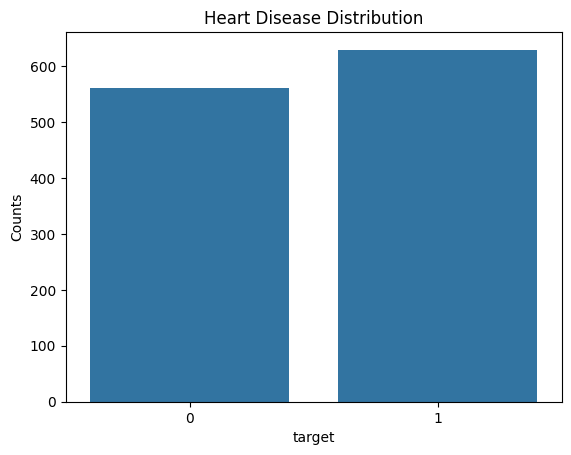

In [10]:
sns.countplot(x = target_feature, data = data)
plt.title("Heart Disease Distribution")
plt.xlabel(target_feature)
plt.ylabel('Counts')
plt.show()

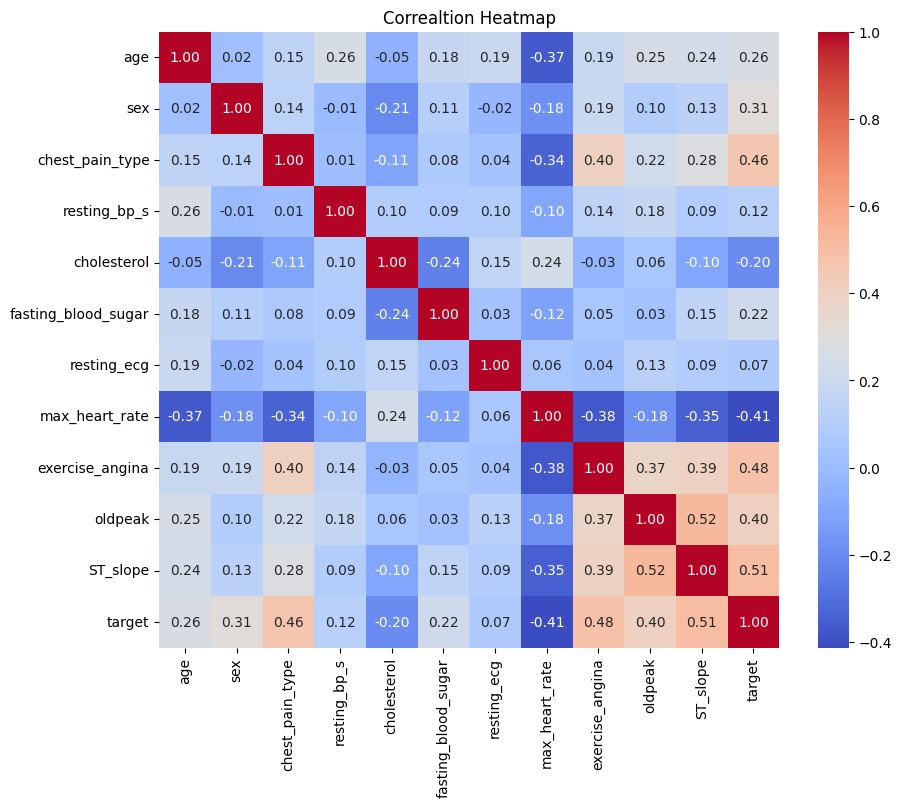

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correaltion Heatmap")
plt.show()

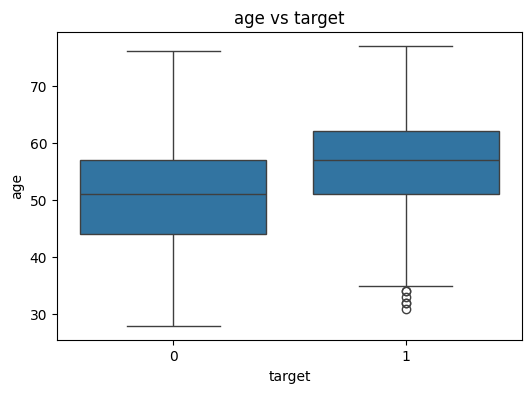

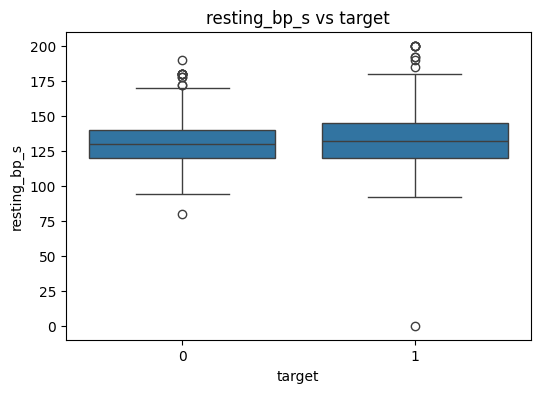

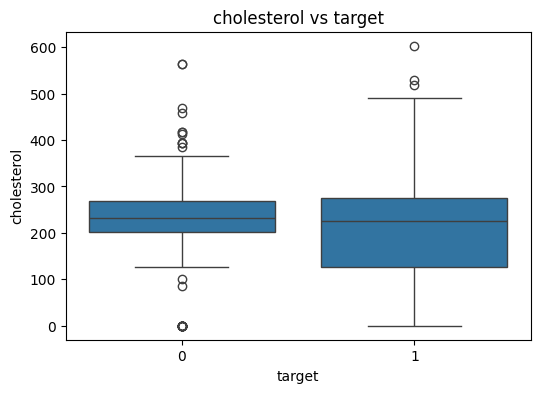

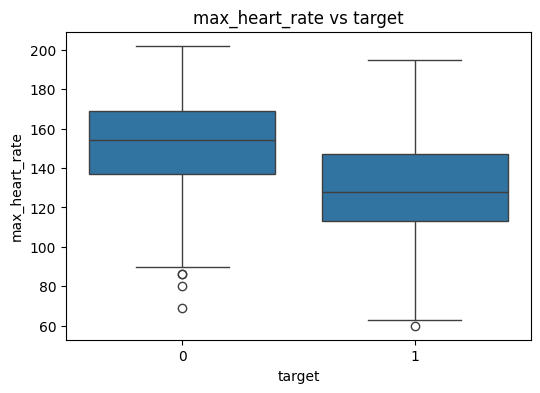

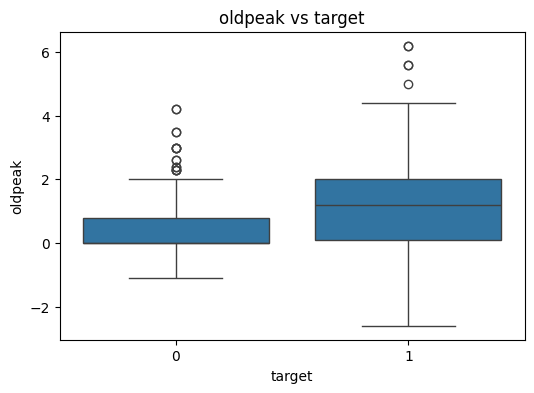

In [12]:
# boxplots of all numeric features
for col in numeric_features:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = target_feature, y = col, data = data)
    plt.title(f"{col} vs {target_feature}")
    plt.show()

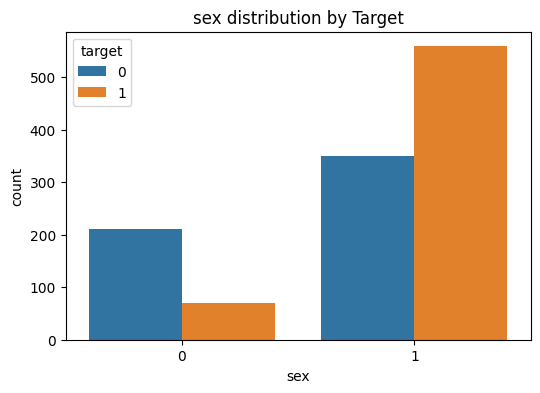

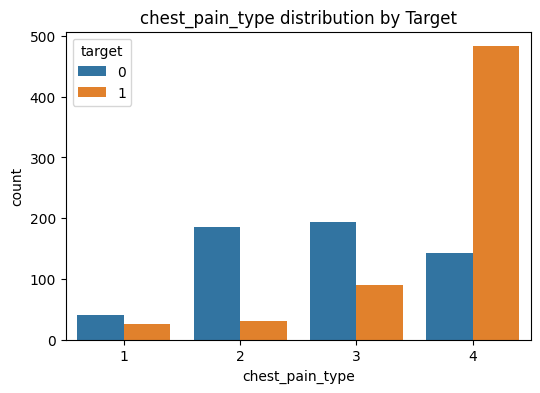

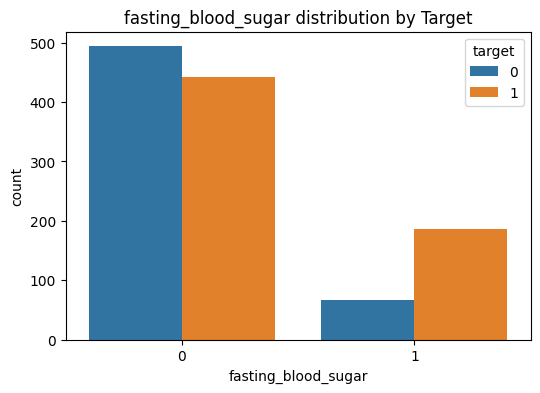

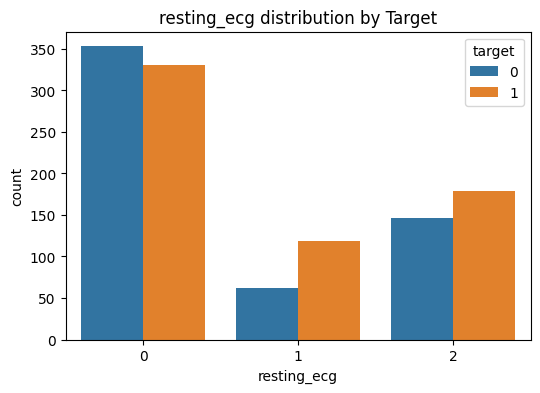

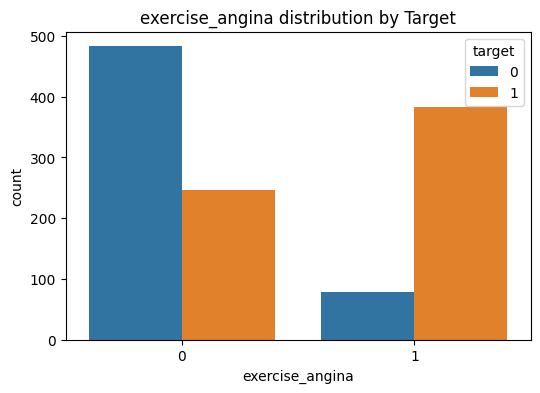

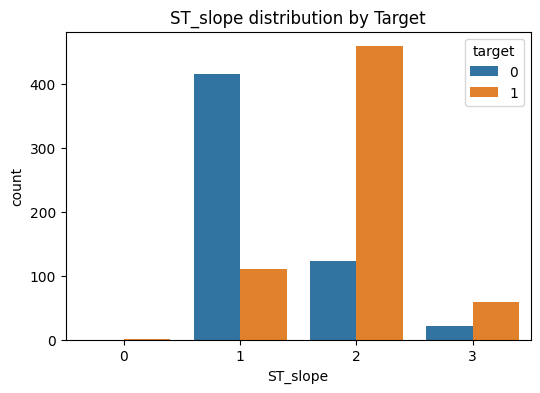

In [13]:
# countplots for all categorical features
for col in categorical_features:
    plt.figure(figsize = (6, 4))
    sns.countplot(x = col, hue = target_feature, data = data)
    plt.title(f"{col} distribution by Target")
    plt.show()

In [14]:
data.loc[(data[target_feature] == 1) & (data['ST_slope'] == 0)]

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
517,68,1,3,150,195,1,0,132,0,0.0,0,1


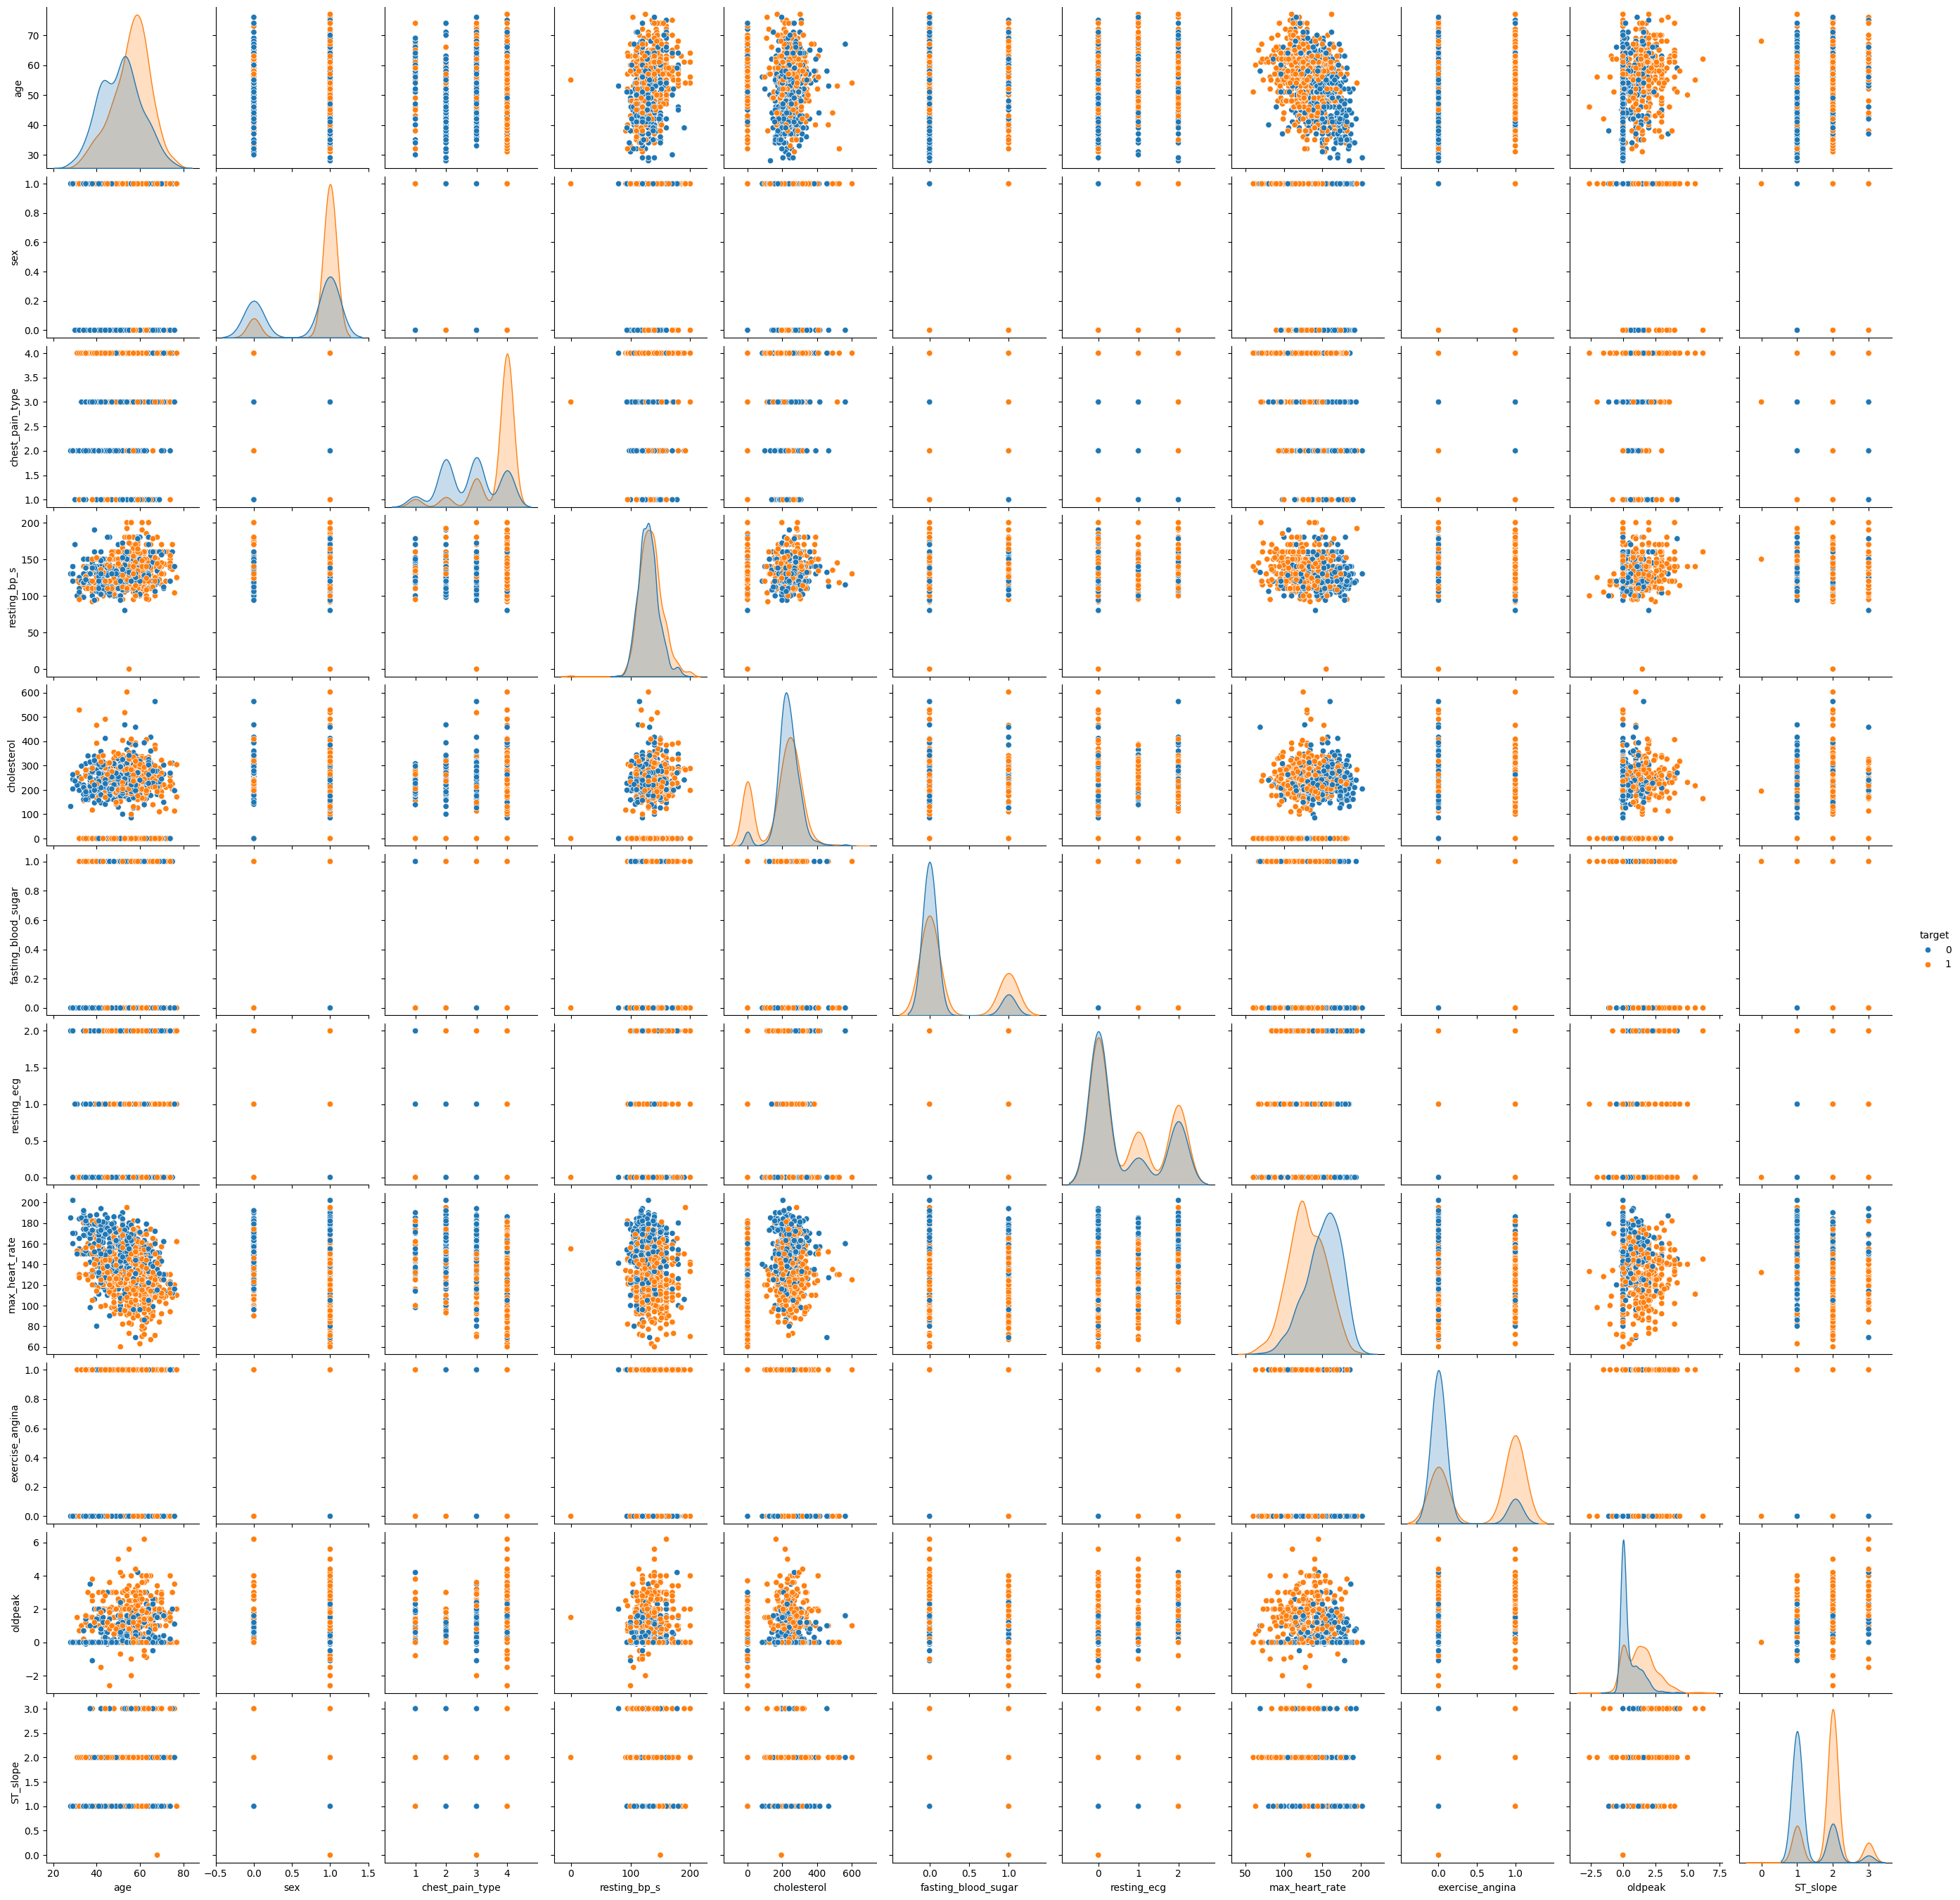

In [15]:
sns.pairplot(data, hue = target_feature, diag_kind = 'kde')

In [16]:
# Cap outliers (Winsorizing)
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25) # 1st quartile
        Q3 = df_capped[col].quantile(0.75) # 3rd quartile
        IQR = Q3 - Q1 # Interquartile range
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower, lower, 
                                  np.where(df_capped[col] > upper, upper, df_capped[col]))
    return df_capped   


In [17]:
# Apply capping 
data_capped = cap_outliers_iqr(data, numeric_features)

In [18]:
data[numeric_features].describe()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [19]:
data_capped[numeric_features].describe()

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,131.857143,218.738971,139.734874,0.914706
std,9.358203,16.954987,79.528022,25.511168,1.055759
min,28.000000,90.000000,65.375000,62.500000,-2.400000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,170.000000,392.375000,202.000000,4.000000


In [20]:
# import necessary librarires for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [21]:
# Split features and target
X = data_capped.drop(target_feature, axis = 1)
y = data_capped[target_feature]

In [22]:
# Preprocessing

# Pipelines for each type
numeric_pipeline = Pipeline(steps = [
    ("num_imputer", SimpleImputer(strategy = "mean")),
    ("num_scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps = [
    ("cat_imputer", SimpleImputer(strategy = "most_frequent")),
    ("cat_encoder", OneHotEncoder(handle_unknown = "ignore"))
])

# Combine using ColumnTransformer
preprocessor = ColumnTransformer(transformers = [
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

In [23]:
# Splitting the data into traning and testing using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# Logistic Regression

# Full pipeline for logistic regression
logreg_pipeline = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(solver = "liblinear")) # liblinear is an optimization library designed for linear classification, including logistic regression and linear SVMs and suitable for small datasets
])

In [26]:
# model fitting
logreg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# predict on the test data
y_pred = logreg_pipeline.predict(X_test)

In [28]:
# evaluation
print("Logistic Regression : \n")
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("\nClassification report : \n", classification_report(y_test, y_pred))
print("\nConfusion matrix : \n", confusion_matrix(y_test, y_pred))

Logistic Regression : 

Accuracy score :  0.8571428571428571

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       112
           1       0.85      0.88      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238


Confusion matrix : 
 [[ 93  19]
 [ 15 111]]


In [29]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# full pipeline for random forest classifier
rf_pipeline = Pipeline(steps = [
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state = 42))
])

In [30]:
# fit the model with training data
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
# predict the test data
y_pred_rf = rf_pipeline.predict(X_test)

In [32]:
# evaluation
print("Random Forest Classifier : \n")
print("Accuracy score : ", accuracy_score(y_test, y_pred_rf))
print("\nClassification report : \n", classification_report(y_test, y_pred_rf))
print("\nConfusion matrix : \n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier : 

Accuracy score :  0.9285714285714286

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       112
           1       0.95      0.91      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238


Confusion matrix : 
 [[106   6]
 [ 11 115]]


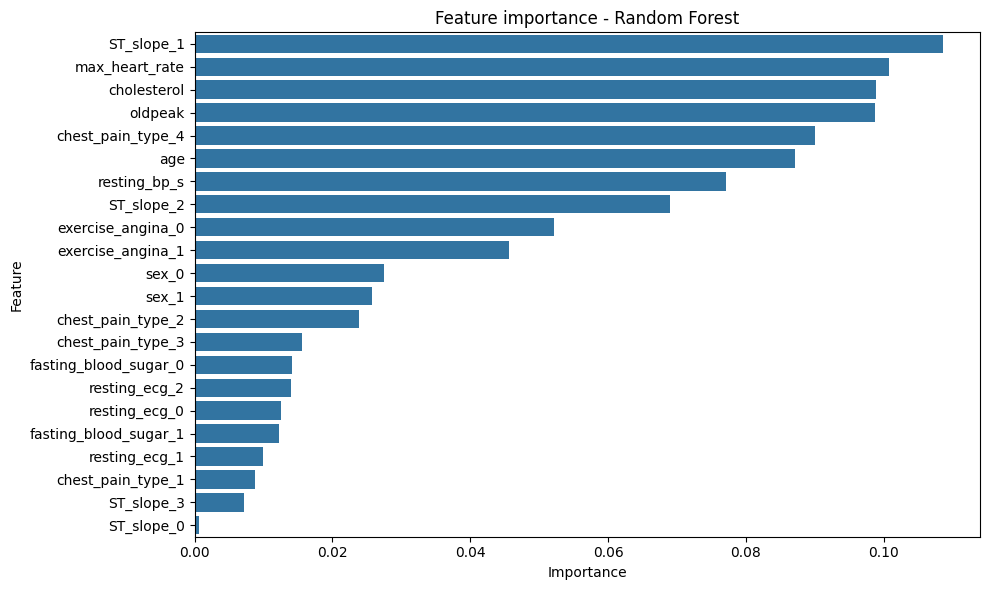

In [33]:
# feature importance
rf_model = rf_pipeline.named_steps["classifier"]

encoder = rf_pipeline.named_steps["preprocessing"].named_transformers_["cat"].named_steps["cat_encoder"]
encoded_cat_features = encoder.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(encoded_cat_features)

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature" : all_feature_names,
    "Importance" : importances
}).sort_values(by = "Importance", ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = feature_importance_df)
plt.title("Feature importance - Random Forest")
plt.tight_layout() # Adjusts layout to prevent overlaps/cut-offs
plt.show()

In [34]:
# cross validation and hyperparameter tuning using grid search for random forest classifier
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {
    "classifier__n_estimators" : [100, 200],
    "classifier__max_depth" : [None, 5, 10],
    "classifier__min_samples_split" : [2, 5],
    "classifier__min_samples_leaf" : [1, 2]
}

# create GridSeachCV pipeline
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1,
    verbose = 2
)

# fit the search
grid_search.fit(X_train, y_train)

# best parameters and score
print("Best parameters : ", grid_search.best_params_)
print("Best cross-validation accuracy : ", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters :  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation accuracy :  0.9096665748139984


In [35]:
# predicting with best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Accuracy (Tuned): ", accuracy_score(y_test, y_pred))
print("\nClassification report : \n", classification_report(y_test, y_pred))
print("\n Confusion matrix : \n", confusion_matrix(y_test, y_pred))

Accuracy (Tuned):  0.8571428571428571

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       112
           1       0.85      0.88      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238


 Confusion matrix : 
 [[ 93  19]
 [ 15 111]]


In [36]:
import joblib

joblib.dump(rf_pipeline, "heart_disease_model.pkl")
print("Default pipeline saved as 'heart_disease_model.pkl'")


Default pipeline saved as 'heart_disease_model.pkl'
